In [50]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import torch
import numpy as np

In [34]:
# forming a collapsed one-hot binary representation

def to_one_hot(word_bank):
    """
    This function takes a list of words and formulates a one-hot representation vector
    ARGS:
        word_bank: A list of words ['one two three four']
        
    returns:
        one_hot: vector represntation, if a list this will return a matrix 
    """
    n = len(word_bank)
    sentences = []
    one_hot_vectorizer = CountVectorizer(binary=True)
    one_hot = one_hot_vectorizer.fit_transform(word_bank).toarray()
    
    # Prints out the map
    if n > 1:
        for i in range(n):
            sentences.append(f'Sentence {i + 1}')
            
        sns.heatmap(one_hot, annot=True, cbar=False, yticklabels=sentences)
            
    else:
        sns.heatmap(one_hot, annot=True, cbar=False, yticklabels=f'Sentence 1')
    return one_hot

In [35]:
# List of two sentences
corpus = ['Time flies flies like an arrow.', 'Fruit flies like a banana']

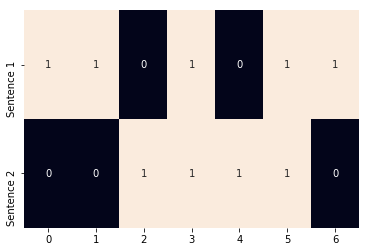

In [36]:
# converting corpus to one-hot represntation
corpus_one_hot = to_one_hot(corpus)

### Tensor Operations

In [45]:
def describe(x):
    print(f'Type: {x.type()}')
    print(f'Shape/Size: {x.shape}')
    print('')
    print(f'Values: {x}')

In [46]:
x = torch.Tensor(2,3)
describe(x)

Type: torch.FloatTensor
Shape/Size: torch.Size([2, 3])

Values: tensor([[ 0.0000e+00, -4.6566e-10, -3.5947e+31],
        [ 4.6577e-10,  2.8026e-45, -4.6566e-10]])


In [59]:
x_np = np.array(np.random.rand(2,3))
x_torch = torch.Tensor(x_np)

In [63]:
describe(torch.rand(2,3))
describe(torch.randn(2,3))

Type: torch.FloatTensor
Shape/Size: torch.Size([2, 3])

Values: tensor([[0.8519, 0.0759, 0.4955],
        [0.9610, 0.9163, 0.8045]])
Type: torch.FloatTensor
Shape/Size: torch.Size([2, 3])

Values: tensor([[ 0.1289,  0.4962,  1.8908],
        [-1.4570, -0.0424,  0.1699]])


In [64]:
zeros = torch.zeros(2,3)
describe(zeros)
zeros.fill_(3) # filling zeros with values of 3
describe(zeros)

Type: torch.FloatTensor
Shape/Size: torch.Size([2, 3])

Values: tensor([[0., 0., 0.],
        [0., 0., 0.]])
Type: torch.FloatTensor
Shape/Size: torch.Size([2, 3])

Values: tensor([[3., 3., 3.],
        [3., 3., 3.]])


In [66]:
x = torch.Tensor(2,3)
describe(x)

Type: torch.FloatTensor
Shape/Size: torch.Size([2, 3])

Values: tensor([[ 0.0000e+00, -4.6566e-10, -4.3623e+31],
        [ 3.6902e+19, -4.3417e+31, -8.5920e+09]])


In [67]:
describe(torch.add(x,x))

Type: torch.FloatTensor
Shape/Size: torch.Size([2, 3])

Values: tensor([[ 0.0000e+00, -9.3132e-10, -8.7246e+31],
        [ 7.3805e+19, -8.6834e+31, -1.7184e+10]])


In [68]:
describe(x + x)

Type: torch.FloatTensor
Shape/Size: torch.Size([2, 3])

Values: tensor([[ 0.0000e+00, -9.3132e-10, -8.7246e+31],
        [ 7.3805e+19, -8.6834e+31, -1.7184e+10]])


In [76]:
torch.Tensor(2,4)

tensor([[ 0.0000e+00, -4.6566e-10, -4.4461e+31, -2.0005e+00],
        [ 2.8026e-45, -4.6566e-10, -4.4454e+31,  1.8653e-40]])

In [79]:
x = torch.arange(6)
describe(x)

Type: torch.LongTensor
Shape/Size: torch.Size([6])

Values: tensor([0, 1, 2, 3, 4, 5])


In [80]:
describe(x.view(2,3))

Type: torch.LongTensor
Shape/Size: torch.Size([2, 3])

Values: tensor([[0, 1, 2],
        [3, 4, 5]])


In [83]:
torch.LongTensor([0,0])

tensor([0, 0])

In [84]:
x = torch.arange(6).view(2,3)
describe(torch.cat([x,x], dim=0))

Type: torch.LongTensor
Shape/Size: torch.Size([4, 3])

Values: tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])


In [85]:
describe(torch.cat([x,x], dim=1))

Type: torch.LongTensor
Shape/Size: torch.Size([2, 6])

Values: tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])


In [86]:
describe(torch.stack([x,x]))

Type: torch.LongTensor
Shape/Size: torch.Size([2, 2, 3])

Values: tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])


In [96]:
x1 = torch.arange(6).view(2,3)
x2 = torch.ones((3,2), dtype=torch.long)

describe(torch.mm(x1, x2))

Type: torch.LongTensor
Shape/Size: torch.Size([2, 2])

Values: tensor([[ 3,  3],
        [12, 12]])


### Gradient Book Keeping

In [98]:
x = torch.ones(2,2, requires_grad=True)
describe(x)
print(x.grad is None)

Type: torch.FloatTensor
Shape/Size: torch.Size([2, 2])

Values: tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
True


In [99]:
y = (x + 2) * (x * 5) + 3
describe(y)
print(y.grad is None)

Type: torch.FloatTensor
Shape/Size: torch.Size([2, 2])

Values: tensor([[18., 18.],
        [18., 18.]], grad_fn=<AddBackward0>)
True


In [100]:
z = y.mean()
describe(z)
z.backward() # computes gradient
print(x.grad is None)

Type: torch.FloatTensor
Shape/Size: torch.Size([])

Values: 18.0
False


In [105]:
torch.cuda.is_available()

False

In [13]:
a = torch.tensor([2,2,1])

In [11]:
a = torch.Tensor(2,4,4)

In [30]:
b = torch.FloatTensor([[2,3,1],[4,2,4],[2,3,4]])

In [32]:
b.view(-1,3)

tensor([[2., 3., 1.],
        [4., 2., 4.],
        [2., 3., 4.]])

In [33]:
b.view(3,-1)

tensor([[2., 3., 1.],
        [4., 2., 4.],
        [2., 3., 4.]])

In [35]:
b.view(9)

tensor([2., 3., 1., 4., 2., 4., 2., 3., 4.])

In [37]:
b.view(9,-1)

tensor([[2.],
        [3.],
        [1.],
        [4.],
        [2.],
        [4.],
        [2.],
        [3.],
        [4.]])

In [40]:
three_dim = torch.rand(2,3,4) # (Channels, rows, columns)

In [41]:
three_dim

tensor([[[0.7533, 0.2802, 0.9017, 0.8866],
         [0.2441, 0.0519, 0.0657, 0.9165],
         [0.6532, 0.1977, 0.4156, 0.3479]],

        [[0.8010, 0.0226, 0.2206, 0.5155],
         [0.4125, 0.7316, 0.9216, 0.1515],
         [0.8601, 0.6551, 0.0674, 0.0380]]])

In [44]:
in_array = torch.randint(6,10,(5,))
in_array

tensor([7, 9, 8, 9, 8])

In [45]:
in_array = torch.randint(6,10,(10,))
in_array

tensor([6, 7, 7, 6, 9, 8, 6, 6, 8, 6])

In [46]:
in_array = torch.randint(6,10,(20,))
in_array

tensor([8, 7, 8, 6, 9, 8, 6, 7, 6, 6, 8, 8, 9, 6, 9, 8, 7, 8, 6, 9])

In [47]:
in_array = torch.randint(1,10,(20,))
in_array

tensor([6, 8, 8, 8, 2, 3, 3, 1, 9, 8, 1, 4, 3, 4, 9, 2, 9, 8, 9, 7])

In [49]:
in_array = torch.randint(1,10,(5,5))
in_array

tensor([[6, 6, 9, 6, 6],
        [1, 9, 7, 8, 5],
        [9, 5, 4, 7, 3],
        [2, 5, 8, 8, 2],
        [7, 6, 4, 7, 1]])

In [51]:
# Concatinating Tensors
one = torch.randn(2,5)
two = torch.randn(3,5)

three = torch.cat([one, two], dim=0)

print(three)

tensor([[-0.6475,  0.7146,  1.1053,  0.0383,  0.5784],
        [-0.9253, -0.2240,  1.2128,  2.2154, -0.9885],
        [ 1.9408,  0.5007,  0.0142, -0.3342,  0.0879],
        [-0.8222, -0.0580, -0.2912,  0.0042, -1.3199],
        [ 0.1171,  1.0902, -0.7563, -0.6841,  0.7581]])


### AutoGrad